In [193]:
import pandas as pd

unf_path="Kopie von toedliche RF-Unfaelle ab 2013.xlsx"
unf= pd.read_excel(unf_path, skiprows=3)#, nrows=20)

In [194]:
unf.head()

,Index,Datum,Ort,Lage*,Straße*,Wegart*,Typ*,Kommentar* (Stand: 16.11.2019),Sex,Alter,Pedelec,Gegner,Schuld*,Key,PLZ,Population,Land
0,19-410,2019-11-14,Mannheim,a,k,FB,solo,Kollaps? RRF,m,61.0,NaN,solo,s,799,68219,309000,BW
1,19-409,2019-11-11,Belm,a,k,RVA,VF,"RF NS, AF HS",m,72.0,NaN,PKW,r,399,49191,14000,NI
2,19-408,2019-11-08,Hagen,a,w,Weg,solo,Kollaps auf Waldweg,m,68.0,NaN,solo,s,762,58093,189000,NRW
3,19-407,2019-11-08,Bielefeld,a,k,RVA,Einfahren,"RF zieht v Seitenstreifen-GRW n li, AF v hi",m,89.0,NaN,PKW,r,399,33689,334000,NRW
4,19-406,2019-11-04,Bielefeld,i,h,RVA,andere,"RF LA, AF v hi, Sprinter",w,65.0,NaN,LKW,g,201,33619,334000,NRW


In [196]:
unf['Datum'] =  pd.to_datetime(unf['Datum'])
unf['year']=unf['Datum'].dt.year

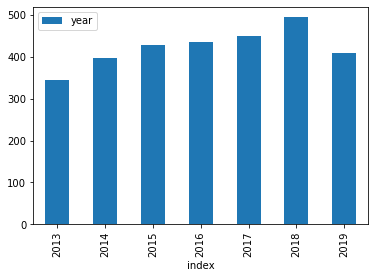

In [197]:
unf.year.value_counts().reset_index().sort_values('index').set_index('index').plot(kind='bar')

## Alle getöteten Radfahrer nach Jahr und Alter

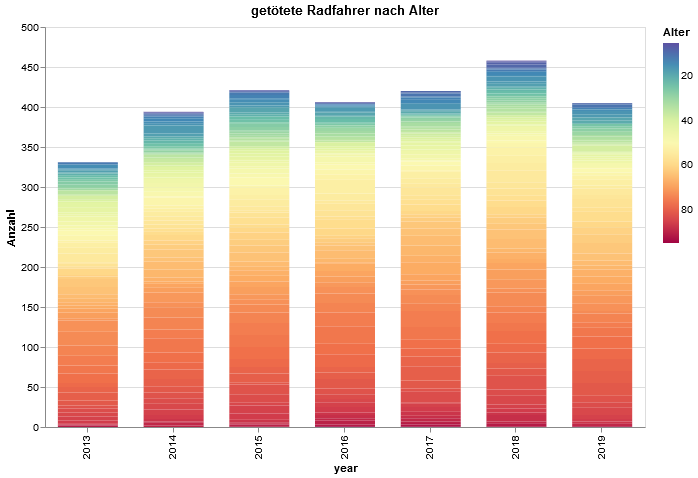

In [150]:
import altair as alt
alt.renderers.enable('notebook')


source = unf.groupby(['year', 'Alter']).size().reset_index()
source=source.rename(columns={0:'Anzahl'})

alt.Chart(source).mark_bar(size=60,strokeOpacity=0.5,strokeWidth=0).encode(
    y='Anzahl',
    x='year:N',
    #color='Alter:Q' #:Q
    color=alt.Color('Alter:Q',#scale=alt.Scale(scheme='greenblue')),
                    scale=alt.Scale(domain=[source.Alter.max(), source.Alter.min()],
                                    scheme=alt.SchemeParams(name='spectral')))

).properties(
    width=600,
    height=400,
    title='getötete Radfahrer nach Alter'
)

## Bei Fahrbahnquerung getötete Radfahrer nach Jahr und Alter

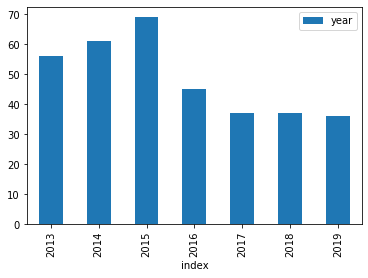

In [198]:
unf_fq=unf[unf['Typ*']=='FQ'].copy()
unf_fq.year.value_counts().reset_index().sort_values('index').set_index('index').plot(kind='bar')

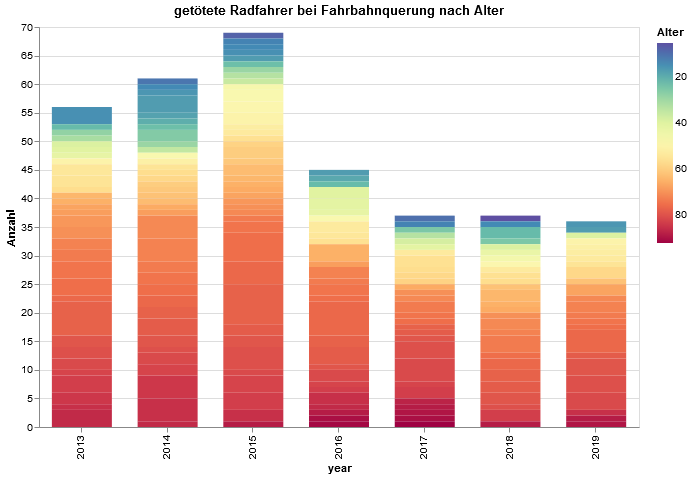

In [148]:
import altair as alt
alt.renderers.enable('notebook')

unf_fq=unf[unf['Typ*']=='FQ'].copy()
source = unf_fq.groupby(['year', 'Alter']).size().reset_index()
source=source.rename(columns={0:'Anzahl'})

alt.Chart(source).mark_bar(size=60,strokeOpacity=0.5,strokeWidth=0).encode(
    y='Anzahl',
    x='year:N',
    #color='Alter:Q' #:Q
    color=alt.Color('Alter:Q',#scale=alt.Scale(scheme='greenblue')),
                    scale=alt.Scale(domain=[source.Alter.max(), source.Alter.min()],
                                    scheme=alt.SchemeParams(name='spectral')))

).properties(
    width=600,
    height=400,
    title='getötete Radfahrer bei Fahrbahnquerung nach Alter'
)

## Bei Rechtsabbieger getötete Radfahrer nach Jahr und Alter

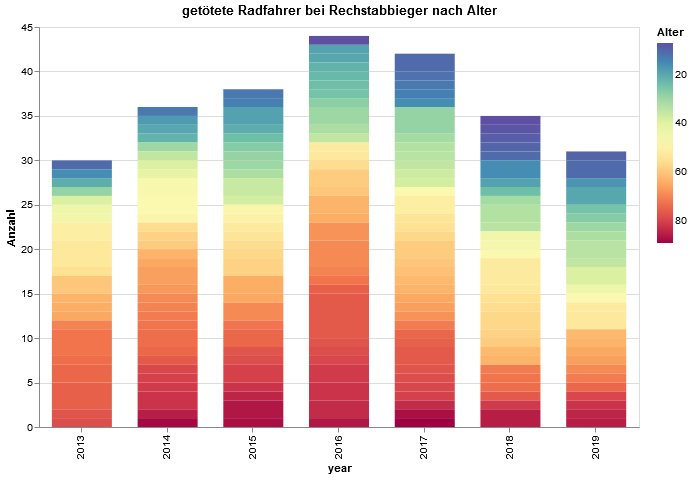

In [199]:
import altair as alt
alt.renderers.enable('notebook')

unf_ra=unf[unf['Typ*']=='RA'].copy()
source = unf_ra.groupby(['year', 'Alter']).size().reset_index()
source=source.rename(columns={0:'Anzahl'})

alt.Chart(source).mark_bar(size=60,strokeOpacity=0.5,strokeWidth=0).encode(
    y='Anzahl',
    x='year:N',
    #color='Alter:Q' #:Q
    color=alt.Color('Alter:Q',#scale=alt.Scale(scheme='greenblue')),
                    scale=alt.Scale(domain=[source.Alter.max(), source.Alter.min()],
                                    scheme=alt.SchemeParams(name='spectral')))

).properties(
    width=600,
    height=400,
    title='getötete Radfahrer bei Rechstabbieger nach Alter'
)

## Bei Einzelfahrunfällen getötete Radfahrer nach Jahr und Alter

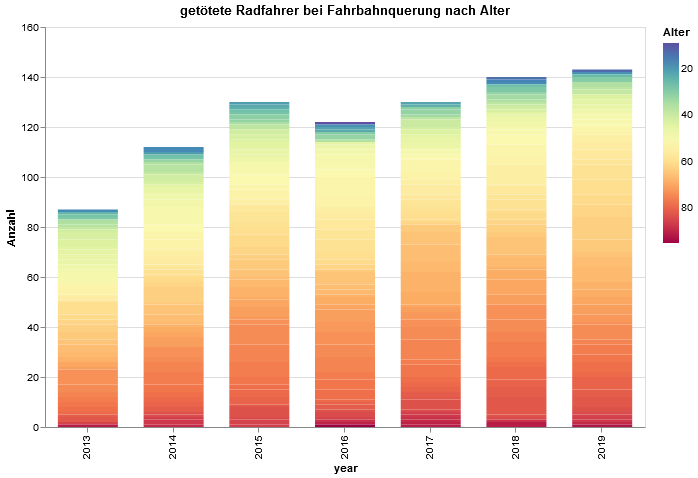

In [159]:
import altair as alt
alt.renderers.enable('notebook')

unf_solo=unf[unf['Typ*']=='solo'].copy()
source = unf_solo.groupby(['year', 'Alter']).size().reset_index()
source=source.rename(columns={0:'Anzahl'})

alt.Chart(source).mark_bar(size=60,strokeOpacity=0.5,strokeWidth=0).encode(
    y='Anzahl',
    x='year:N',
    #color='Alter:Q' #:Q
    color=alt.Color('Alter:Q',#scale=alt.Scale(scheme='greenblue')),
                    scale=alt.Scale(domain=[source.Alter.max(), source.Alter.min()],
                                    scheme=alt.SchemeParams(name='spectral')))

).properties(
    width=600,
    height=400,
    title='getötete Radfahrer bei Einzelfahrunfällen nach Alter'
)

## Bei Überholvorgängen getötete Radfahrer nach Jahr und Alter

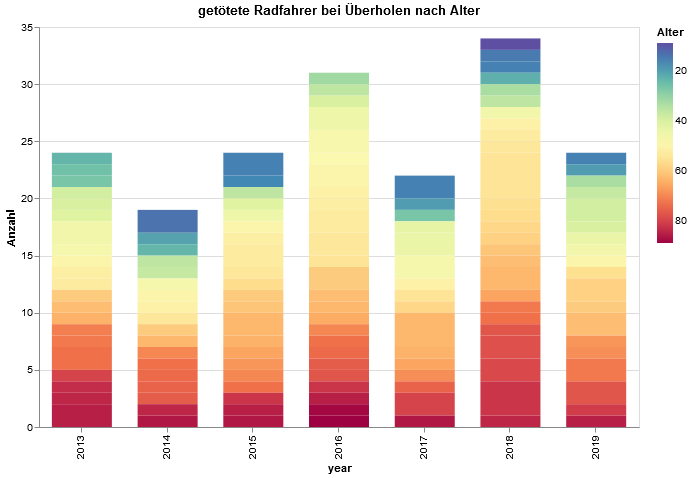

In [158]:
import altair as alt
alt.renderers.enable('notebook')

unf_ue=unf[unf['Typ*']=='Ü'].copy()
source = unf_ue.groupby(['year', 'Alter']).size().reset_index()
source=source.rename(columns={0:'Anzahl'})

alt.Chart(source).mark_bar(size=60,strokeOpacity=0.5,strokeWidth=0).encode(
    y='Anzahl',
    x='year:N',
    #color='Alter:Q' #:Q
    color=alt.Color('Alter:Q',#scale=alt.Scale(scheme='greenblue')),
                    scale=alt.Scale(domain=[source.Alter.max(), source.Alter.min()],
                                    scheme=alt.SchemeParams(name='spectral')))

).properties(
    width=600,
    height=400,
    title='getötete Radfahrer bei Überholen nach Alter'
)

---
## getötete Radfahrer nach Unfalltyp und Alter

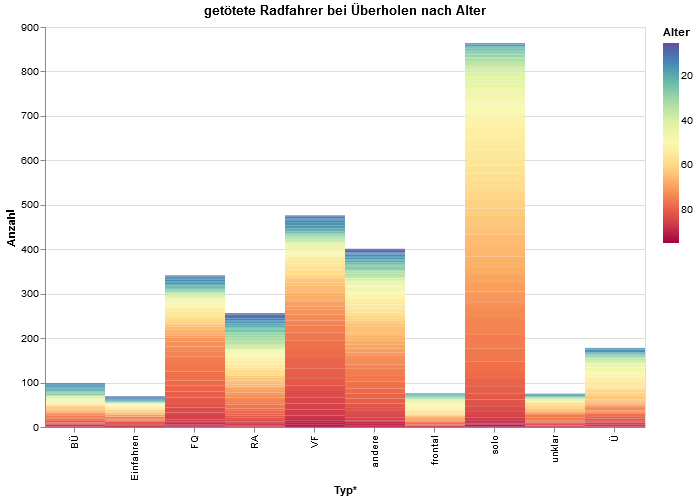

In [161]:
import altair as alt
alt.renderers.enable('notebook')

#unf_ue=unf[unf['Typ*']=='Ü'].copy()
source = unf.groupby(['Typ*', 'Alter']).size().reset_index()
source=source.rename(columns={0:'Anzahl'})

alt.Chart(source).mark_bar(size=60,strokeOpacity=0.5,strokeWidth=0).encode(
    y='Anzahl',
    x='Typ*:N',
    #color='Alter:Q' #:Q
    color=alt.Color('Alter:Q',#scale=alt.Scale(scheme='greenblue')),
                    scale=alt.Scale(domain=[source.Alter.max(), source.Alter.min()],
                                    scheme=alt.SchemeParams(name='spectral')))

).properties(
    width=600,
    height=400,
    title='getötete Radfahrer bei Überholen nach Alter'
)

In [ ]:
####################

##  getötete Radfahrer nach Alter und Unfalltyp

In [185]:
bins=range(0,100,10)
groups = unf.groupby(['Typ*', pd.cut(unf.Alter, bins)])
groups_bins=groups.size().reset_index()#.unstack()
groups_bins=groups_bins.rename(columns={0:'Anzahl'})

groups_bins.Alter=groups_bins.Alter.astype(str)
groups_bins.Alter=groups_bins.Alter.str.replace('(',"").str.replace(', '," bis ").str.replace(']',"")

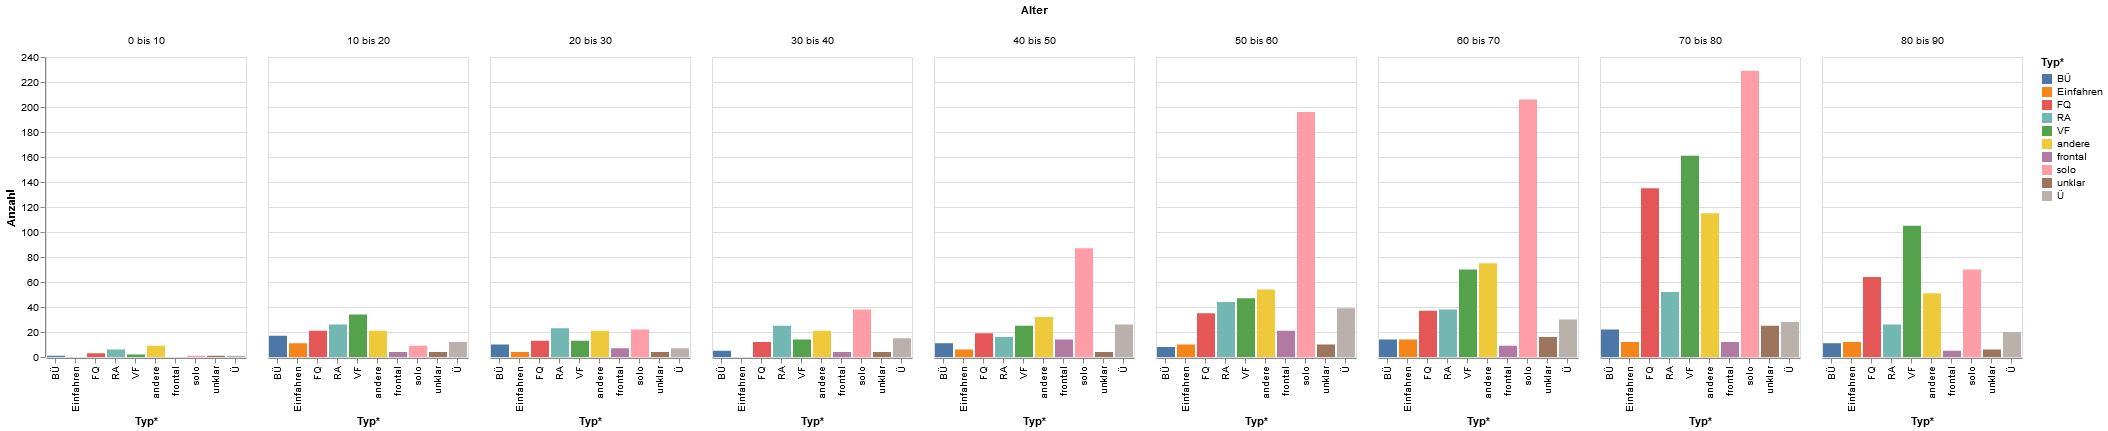

In [186]:
import altair as alt

source = groups_bins

alt.Chart(source).mark_bar().encode(

    x='Typ*:O',
    y='Anzahl:Q',
    color='Typ*:N',
    column='Alter:N',
    tooltip=['Anzahl']
)

##  getötete Radfahrer nach Alter und Unfallgegner

In [220]:
bins=range(0,100,10)
groups = unf.groupby(['Gegner', pd.cut(unf.Alter, bins)])
groups_bins=groups.size().reset_index()#.unstack()
groups_bins=groups_bins.rename(columns={0:'Anzahl'})

groups_bins.Alter=groups_bins.Alter.astype(str)
groups_bins.Alter=groups_bins.Alter.str.replace('(',"").str.replace(', '," bis ").str.replace(']',"")

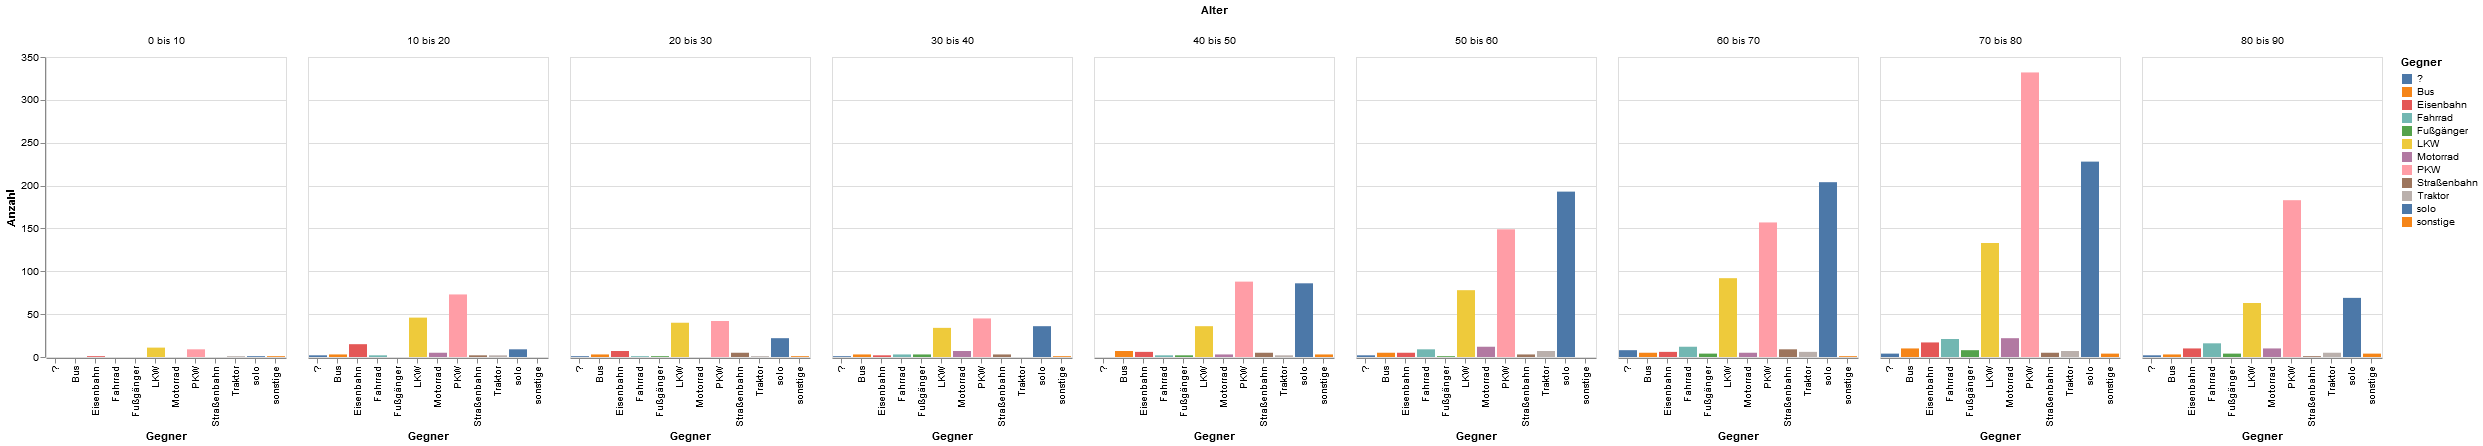

In [221]:
source = groups_bins

alt.Chart(source).mark_bar().encode(

    x='Gegner:O',
    y='Anzahl:Q',
    color='Gegner:N',
    column='Alter:N',
    tooltip=['Anzahl']
)

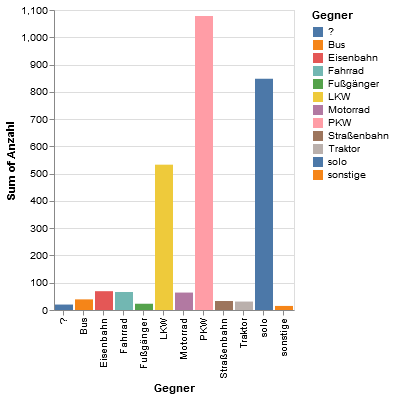

In [226]:
source = groups_bins

chart=alt.Chart(source).mark_bar().encode(

    x='Gegner:O',
    y='sum(Anzahl):Q',
    color='Gegner:N',
    tooltip=['sum(Anzahl)']
)

    
    
chart #+ text

##  getötete Radfahrer nach Gemeindegröße und Unfallgegner

In [263]:
bins=[0,4000,10000,20000,50000,250000,5000000]
groups = unf.groupby(['Gegner', pd.cut(unf.Population, bins)])
groups_bins=groups.size().reset_index()#.unstack()
groups_bins=groups_bins.rename(columns={0:'Anzahl'})

groups_bins.Population=groups_bins.Population.astype(str)
#groups_bins.Population=groups_bins.Population.str.replace('(',"").str.replace(', '," bis ").str.replace(']',"")

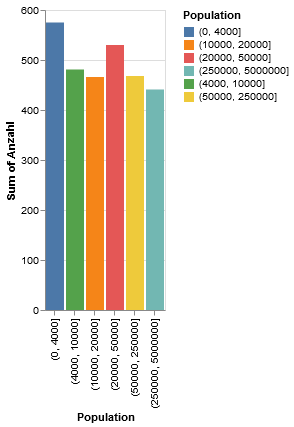

In [264]:
source = groups_bins

chart=alt.Chart(source).mark_bar().encode(

    #x='Population:O',
    x=alt.X(
        'Population:O',
        sort=alt.EncodingSortField(
            field="Population",  # The field to use for the sort
            order="ascending"  # The order to sort in
        )),
    y='sum(Anzahl):Q',
    color='Population:N',
    tooltip=['sum(Anzahl)']
)

    
    
chart #+ text

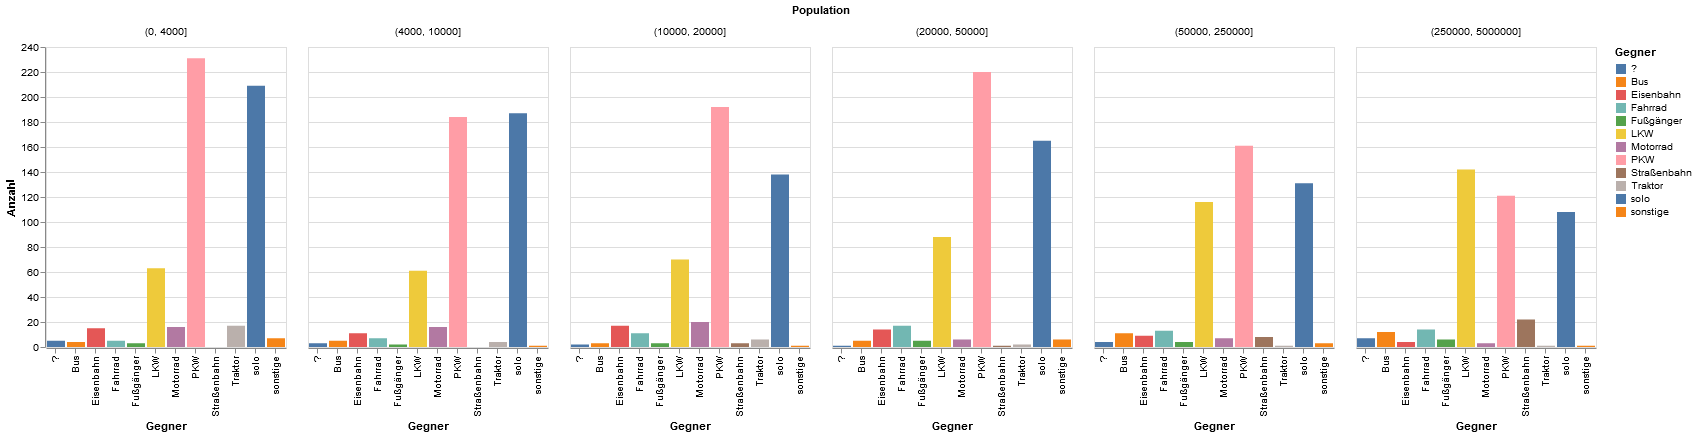

In [260]:
source = groups_bins

alt.Chart(source).mark_bar().encode(

    x='Gegner:O',
    y='Anzahl:Q',
    color='Gegner:N',
    #facet='Population:O',
    facet=alt.Facet('Population:O',
        sort=alt.EncodingSortField('Population', order='descending')
    ),
    
    tooltip=['Anzahl']
)

##  getötete Radfahrer nach Gemeindegröße und Unfalltyp

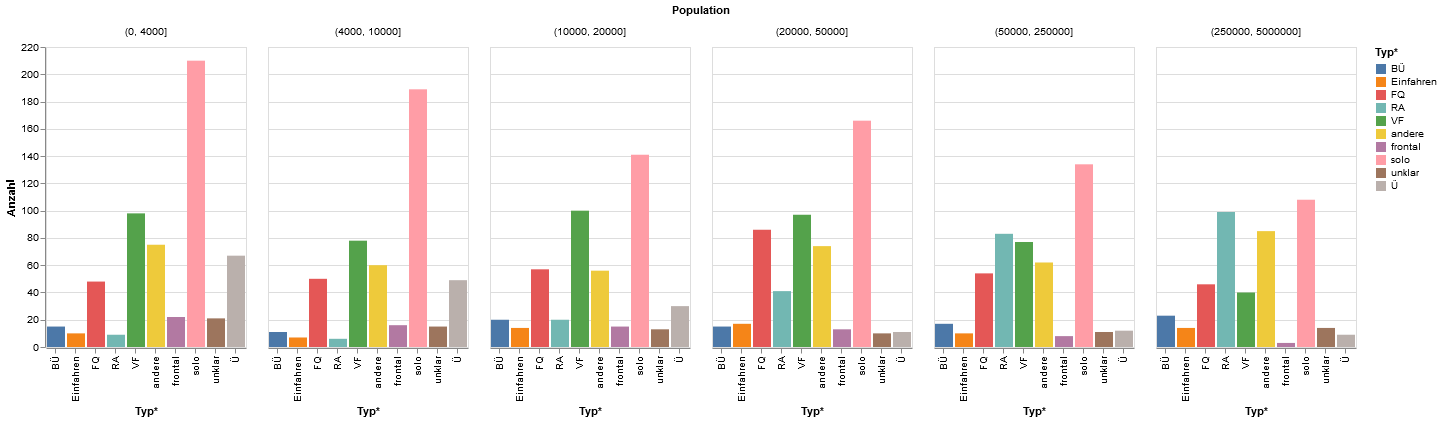

In [267]:
bins=[0,4000,10000,20000,50000,250000,5000000]
groups = unf.groupby(['Typ*', pd.cut(unf.Population, bins)])
groups_bins=groups.size().reset_index()#.unstack()
groups_bins=groups_bins.rename(columns={0:'Anzahl'})

groups_bins.Population=groups_bins.Population.astype(str)
#groups_bins.Population=groups_bins.Population.str.replace('(',"").str.replace(', '," bis ").str.replace(']',"")

source = groups_bins

alt.Chart(source).mark_bar().encode(

    x='Typ*:O',
    y='Anzahl:Q',
    color='Typ*:N',
    #facet='Population:O',
    facet=alt.Facet('Population:O',
        sort=alt.EncodingSortField('Population', order='descending')
    ),
    
    tooltip=['Anzahl']
)